# Customer Segmentation Analysis

The following is a customer segmentation, also referred to as a market basket analysis. The purpose of this analysis is to divide customers into various distinct segments fo easier targeted marketing. The analysis groups customers based on their characteristics, behaviors, and attributes. The goal of customer segmentation is to better understand and cater to the diverse needs, preferences, and behaviors of different customer groups, rather than treating all customers as a homogeneous mass.

In this analysis, I will use unsupervised machine learning (ML), specifically the K-Means Algorithm to cluster customers into distinct groups of target customers.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Exploration and Manipulation

The data contains some basic mall customers' data like Customer ID, age, gender, annual income and spending score.

Spending Score is a metric assigned to the customers based on your defined parameters like customer behavior and purchasing data.

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
duplicates = df[df.duplicated]
print(duplicates)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


There are no duplicates in this dataset. Duplicates would typically affect a k-means clustering by resulting in some clusters being "overpopulated" with similar points, while others might lack enough representation. Additionally, duplicates could create regions of higher density within clusters, making it more challenging for the algorithm to separate distinct clusters properly.
If duplicates are heavily concentrated in certain regions, clusters might become "over-inflated" in those areas. Thus, if available, it would be necessary to drop duplicates.

In [8]:
df = df.drop(['CustomerID'], axis = 1)
df.head(4)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77


Droped the "Customer ID" column from the dataframe because it contains distinct values of customer IDs; hence, will not be useful in the clustering process.

## Visualization

In [9]:
from ipywidgets import interactive
def size_widgets(height = 2.5, aspect = 1):
    sns.pairplot(df, kind = 'reg', height=height, aspect=aspect)

In [10]:
interactive(size_widgets, height = (1, 3.5, 0.5), aspect = (0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

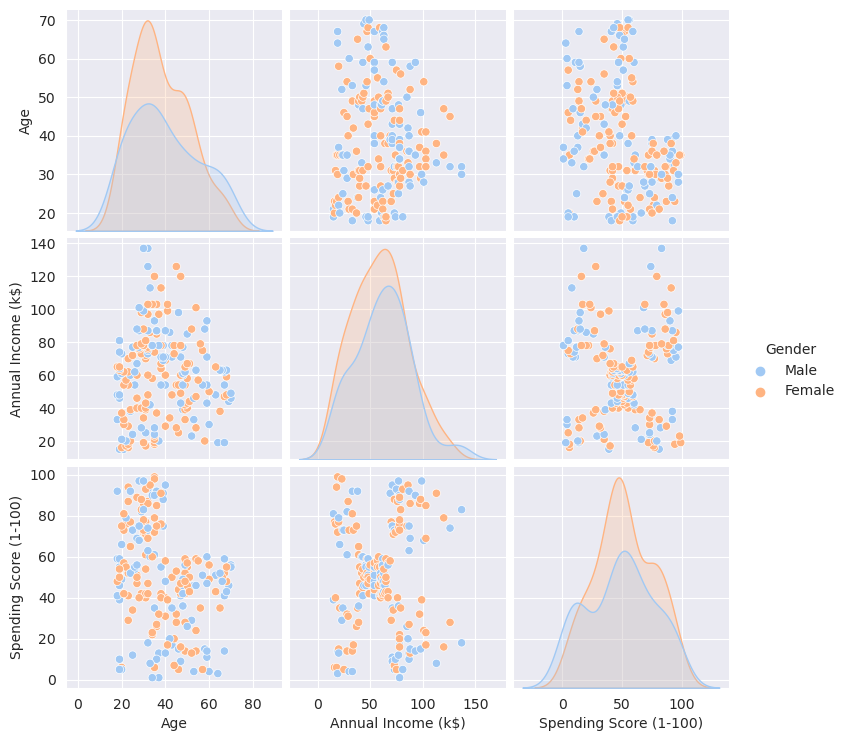

In [11]:
sns.set_style("darkgrid")
sns.pairplot(df, hue = "Gender", palette = 'pastel')
plt.show()

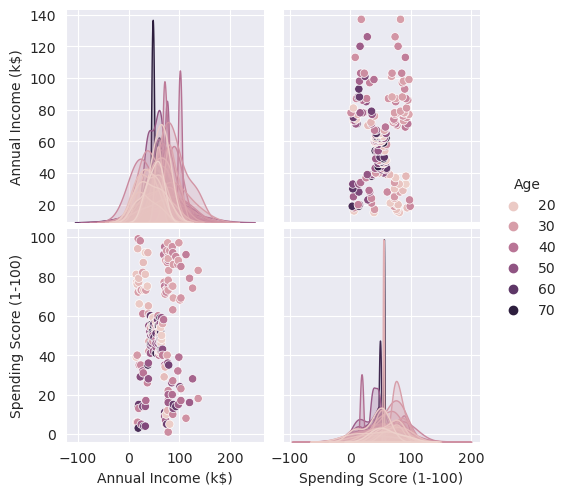

In [12]:
sns.pairplot(df, hue = "Age")
plt.show()

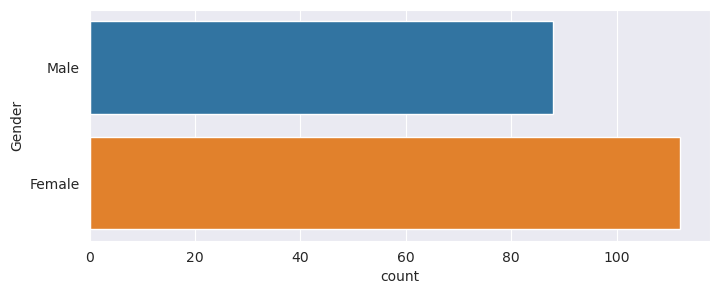

In [13]:
plt.figure(1 , figsize = (8 , 3))
sns.countplot(y = 'Gender' , data = df)
plt.show()

## Feature Engineering

K-means is a distance-based clustering algorithm that relies on calculating distances between variables. Thus, it is important that all data is numerical. Therefore, we will change the "Genders' data to integers as follows;

Male = 0
Female = 1

In [14]:
df["Gender"].replace(['Male', 'Female'], [0,1], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


## Clustering using K Means

I used the elbow method to estimate K (number of clusters)

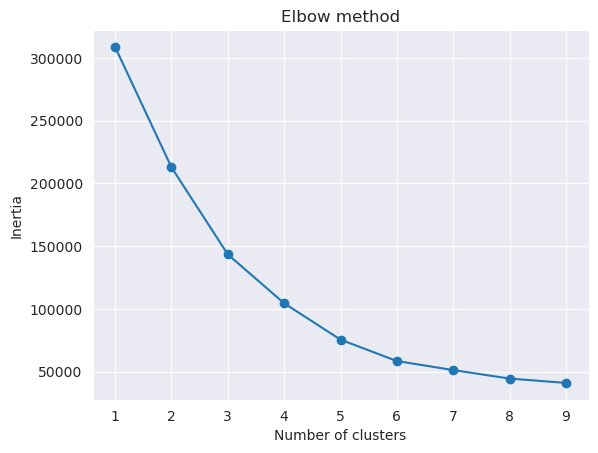

In [15]:
range_k = range(1,10)
sse = []
for i in range_k:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

plt.plot(range_k, sse, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
km = KMeans(n_clusters=4)
km.fit(df)
km.labels_


plt.scatter(df['Annual Income'], df['Spending Score'] c=km.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1148131451.py, line 6)